In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
proj = '24Mg'
trg = '181Ta'
cn = '205At'
bf = 0.78
ch = 'xn'
sigr = 3.2
bf_diff = 0.01

df10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

bf_low_10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
bf_high_10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

bf_low_0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
bf_high_0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
print('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df10_mb

data/24Mg_181Ta_205At_xn_IFUS10_barfac0.78_sigr3.2.dat


,E_lab,E*/MeV,195At,196At,197At,198At,199At,200At,201At,202At,203At,204At,205At
0,98.248,37.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,3.350000e-09,0.000003,4.930000e-07,8.110000e-11,0.0
1,99.381,38.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,1.120000e-07,0.000015,1.740000e-06,2.110000e-10,0.0
2,100.513,39.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,2.250000e-06,0.000073,5.770000e-06,5.260000e-10,0.0
3,101.646,40.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,2.930000e-05,0.000337,1.810000e-05,1.250000e-09,0.0
4,102.778,41.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,2.710000e-04,0.001410,5.350000e-05,2.890000e-09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,210.375,136.0,0.000428,0.000407,0.000061,7.610000e-08,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0
100,211.508,137.0,0.000383,0.000334,0.000040,3.410000e-08,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0
101,212.640,138.0,0.000341,0.000272,0.000025,9.860000e-09,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0
102,213.773,139.0,0.000301,0.000221,0.000015,0.000000e+00,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0


## Experimental values with errors

In [10]:
# Andreyev, in ub
e_lab = [119,128.8,136,137.5,141.9,151.9,162.8,167.8,172.8]
exp = [[np.nan,np.nan,np.nan,np.nan,np.nan,7,50,54,43], [np.nan,np.nan,60,293,650,850,270,210,77], [27,1980,4400,3800,2900,540,35,44,12], [24300,29700,8100,3300,1720,150,np.nan,np.nan,np.nan]]
exp = np.array(exp)/1e3


## Scaling of the values to mb, ub or nb

In [11]:
dfm10_mb = df10_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10 = dfm10_mb
dfm0 = dfm0_mb
df10 = df10_mb
df0 = df0_mb
bf_low_10 = bf_low_10_mb
bf_high_10 = bf_high_10_mb
bf_low_0 = bf_low_0_mb
bf_high_0 = bf_high_0_mb

mb = 1
ub = 1e3
nb = 1e6

scale = mb
dfm10['CS'] = dfm10_mb['CS']*scale
dfm0['CS'] = dfm0_mb['CS']*scale
df10.iloc[:,2:] = df10_mb.iloc[:,2:] * scale
df0.iloc[:,2:] = df0_mb.iloc[:,2:] * scale
bf_low_10.iloc[:,2:] = bf_low_10_mb.iloc[:,2:] * scale
bf_high_10.iloc[:,2:] = bf_high_10_mb.iloc[:,2:] * scale
bf_low_0.iloc[:,2:] = bf_low_0_mb.iloc[:,2:] * scale
bf_high_0.iloc[:,2:] = bf_high_0_mb.iloc[:,2:] * scale
dfm10.describe()
exp = exp * scale

## Plotting

/tmp/ipykernel_43056/1939323768.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], palette=colors)
/tmp/ipykernel_43056/1939323768.py:26: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], linestyle='--', legend=None, palette=colors)
/home/adam/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


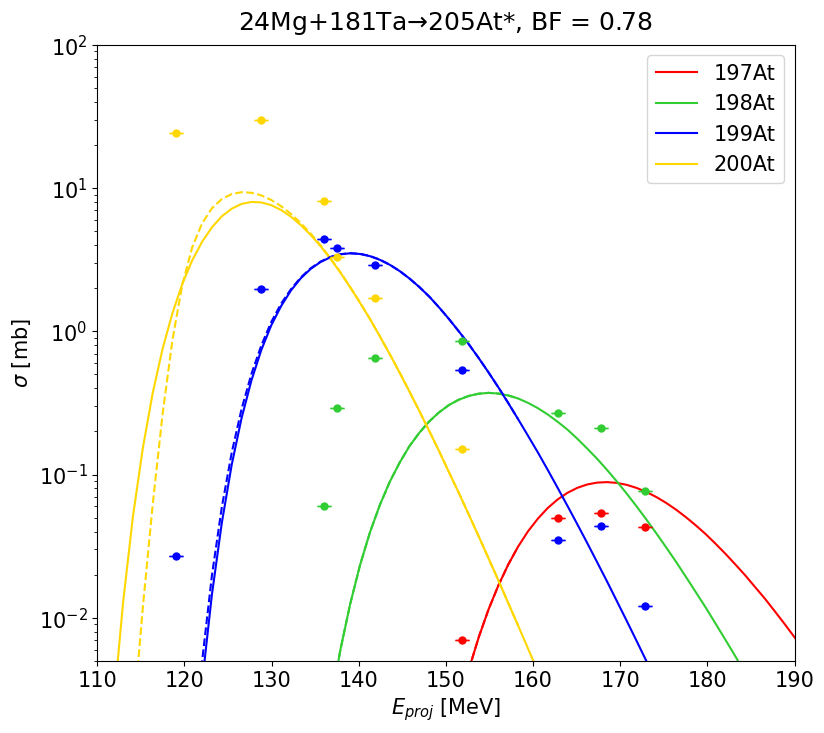

In [12]:
plt.rcParams.update({'font.size': 15})
colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta', 'grey', 'olive', 'brown']
sns.color_palette("dark")

plot_from = 2
plot_to = 5

fig, ax = plt.subplots(figsize=(9,8))
sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], palette=colors)
plt.semilogy()
plt.ylim(5e-3, 1e2)
plt.xlim(110, 190)
# plt.suptitle(proj + ' + ' + trg + r' $\rightarrow$ ' + cn + '*, BF = ' + str(bf) + ' $\pm$ ' + str(bf_diff) + ', sigr0 = ' + str(sigr) + ', ' + ch + ' channels', va='top')
# plt.title('Exp. values: Andreyev, A. N. No. JINR-E-7-89-809. JINR, 1989', va='bottom', fontsize='small')
plt.title(proj + '+' + trg + r'$\to$' + cn + '*' + ', BF = ' + str(bf), va='bottom')

if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
plt.xlabel('$E_{proj}$ [MeV]')
plt.legend(loc='upper right')

sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], linestyle='--', legend=None, palette=colors)

## assymetric errors
# for i in range(len(exp)):
#     (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=[err_min[i], err_max[i]], marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
#     for cap in caps:
#         cap.set_markeredgewidth(1)

# # symmetric errors
# for i in range(len(exp)):
#     (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=err[i], marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
#     for cap in caps:
#         cap.set_markeredgewidth(1)

# no errors        
for i in range(len(exp)):
    (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=0, marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
    for cap in caps:
        cap.set_markeredgewidth(1)
        
# alpha_value = 0.1
# for i in range(plot_from+2, len(df10.columns)-plot_to):
#     plt.fill_between(df10.iloc[:, 0],  df10.iloc[:, i], bf_low_10.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)
#     plt.fill_between(df10.iloc[:, 0],  df10.iloc[:, i], bf_high_10.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)
#     plt.fill_between(df0.iloc[:, 0],  df0.iloc[:, i], bf_low_0.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)
#     plt.fill_between(df0.iloc[:, 0],  df0.iloc[:, i], bf_high_0.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)


plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.png', bbox_inches='tight')
plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.pdf', bbox_inches='tight')